In [8]:
import json
import os

# Spécifiez le chemin du dossier dans lequel vous souhaitez créer le fichier
dossier = "C:/Users/asus/Desktop/rnn_nounamo"

# Assurez-vous que le dossier existe, sinon, créez-le
if not os.path.exists(dossier):
    os.makedirs(dossier)


# Construisez le chemin complet du fichier data.json
chemin_fichier = os.path.join(dossier, "data_5.json")

# Écrivez les données dans le fichier JSON
with open(chemin_fichier, 'w') as fichier_json:
    json.dump({}, fichier_json, indent=4)

print(f'Le fichier data.json a été créé dans le dossier : {dossier}')


Le fichier data.json a été créé dans le dossier : C:/Users/asus/Desktop/rnn_nounamo


In [29]:
import json
import os
import math
import librosa
import warnings

# Ignorer les avertissements FutureWarning spécifiques à librosa
warnings.filterwarnings("ignore", category=FutureWarning, module="librosa")

DATASET_PATH = "C:/Users/asus/Desktop/rnn_nounamo/africa_songs"
JSON_PATH = "C:/Users/asus/Desktop/rnn_nounamo/data.json"
SAMPLE_RATE = 22050
TRACK_DURATION = 30 # measured in seconds
SAMPLES_PER_TRACK = SAMPLE_RATE * TRACK_DURATION


def save_mfcc(dataset_path, json_path, num_mfcc=13, n_fft=2048, hop_length=512, num_segments=5):
    """Extracts MFCCs from music dataset and saves them into a json file along witgh genre labels.

        :param dataset_path (str): Path to dataset
        :param json_path (str): Path to json file used to save MFCCs
        :param num_mfcc (int): Number of coefficients to extract
        :param n_fft (int): Interval we consider to apply FFT. Measured in # of samples
        :param hop_length (int): Sliding window for FFT. Measured in # of samples
        :param: num_segments (int): Number of segments we want to divide sample tracks into
        :return:
        """

    # dictionary to store mapping, labels, and MFCCs
    data = {
        "mapping": [],
        "labels": [],
        "mfcc": []
    }

    samples_per_segment = int(SAMPLES_PER_TRACK / num_segments)
    num_mfcc_vectors_per_segment = math.ceil(samples_per_segment / hop_length)

    # loop through all genre sub-folder
    for i, (dirpath, dirnames, filenames) in enumerate(os.walk(dataset_path)):

        # ensure we're processing a genre sub-folder level
        if dirpath is not dataset_path:

            # save genre label (i.e., sub-folder name) in the mapping
            semantic_label = dirpath.split("/")[-1]
            data["mapping"].append(semantic_label)
            print("\nProcessing: {}".format(semantic_label))

            # process all audio files in genre sub-dir
            for f in filenames:

# load audio file
                file_path = os.path.join(dirpath, f)
                signal, sample_rate = librosa.load(file_path, sr=SAMPLE_RATE)

                # process all segments of audio file
                for d in range(num_segments):

                    # calculate start and finish sample for current segment
                    start = samples_per_segment * d
                    finish = start + samples_per_segment

                    # extract mfcc
                    mfcc = librosa.feature.mfcc(y=signal[start:finish],sr=sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
                    mfcc = mfcc.T

                    # store only mfcc feature with expected number of vectors
                    if len(mfcc) == num_mfcc_vectors_per_segment:
                        data["mfcc"].append(mfcc.tolist())
                        data["labels"].append(i-1)
                        print("{}, segment:{}".format(file_path, d+1))

    # save MFCCs to json file
    with open(json_path, "w") as fp:
        json.dump(data, fp, indent=4)
        
        
if __name__ == "__main__":
    save_mfcc(DATASET_PATH, JSON_PATH, num_segments=10)


Processing: africa_songs\afrobeat
C:/Users/asus/Desktop/rnn_nounamo/africa_songs\afrobeat\Afro B - Drogba (Joanna) Prod by Team Salut [Official Music Video](MP3_70K).mp3, segment:1
C:/Users/asus/Desktop/rnn_nounamo/africa_songs\afrobeat\Afro B - Drogba (Joanna) Prod by Team Salut [Official Music Video](MP3_70K).mp3, segment:2
C:/Users/asus/Desktop/rnn_nounamo/africa_songs\afrobeat\Afro B - Drogba (Joanna) Prod by Team Salut [Official Music Video](MP3_70K).mp3, segment:3
C:/Users/asus/Desktop/rnn_nounamo/africa_songs\afrobeat\Afro B - Drogba (Joanna) Prod by Team Salut [Official Music Video](MP3_70K).mp3, segment:4
C:/Users/asus/Desktop/rnn_nounamo/africa_songs\afrobeat\Afro B - Drogba (Joanna) Prod by Team Salut [Official Music Video](MP3_70K).mp3, segment:5
C:/Users/asus/Desktop/rnn_nounamo/africa_songs\afrobeat\Afro B - Drogba (Joanna) Prod by Team Salut [Official Music Video](MP3_70K).mp3, segment:6
C:/Users/asus/Desktop/rnn_nounamo/africa_songs\afrobeat\Afro B - Drogba (Joanna) Pr

C:/Users/asus/Desktop/rnn_nounamo/africa_songs\afrobeat\Oxlade - Away ( Official Music Video)(MP3_70K).mp3, segment:9
C:/Users/asus/Desktop/rnn_nounamo/africa_songs\afrobeat\Oxlade - Away ( Official Music Video)(MP3_70K).mp3, segment:10
C:/Users/asus/Desktop/rnn_nounamo/africa_songs\afrobeat\Rema - Lady (Official Music Video)(MP3_70K).mp3, segment:1
C:/Users/asus/Desktop/rnn_nounamo/africa_songs\afrobeat\Rema - Lady (Official Music Video)(MP3_70K).mp3, segment:2
C:/Users/asus/Desktop/rnn_nounamo/africa_songs\afrobeat\Rema - Lady (Official Music Video)(MP3_70K).mp3, segment:3
C:/Users/asus/Desktop/rnn_nounamo/africa_songs\afrobeat\Rema - Lady (Official Music Video)(MP3_70K).mp3, segment:4
C:/Users/asus/Desktop/rnn_nounamo/africa_songs\afrobeat\Rema - Lady (Official Music Video)(MP3_70K).mp3, segment:5
C:/Users/asus/Desktop/rnn_nounamo/africa_songs\afrobeat\Rema - Lady (Official Music Video)(MP3_70K).mp3, segment:6
C:/Users/asus/Desktop/rnn_nounamo/africa_songs\afrobeat\Rema - Lady (Offi

C:/Users/asus/Desktop/rnn_nounamo/africa_songs\amapiano\dj_tarico_ft_preck_nelson_tivane_yaba_buluku_mp3_50636.mp3, segment:10
C:/Users/asus/Desktop/rnn_nounamo/africa_songs\amapiano\Focalistic Ke Star (Official Music Video) ft Vigro Deep(MP3_70K).mp3, segment:1
C:/Users/asus/Desktop/rnn_nounamo/africa_songs\amapiano\Focalistic Ke Star (Official Music Video) ft Vigro Deep(MP3_70K).mp3, segment:2
C:/Users/asus/Desktop/rnn_nounamo/africa_songs\amapiano\Focalistic Ke Star (Official Music Video) ft Vigro Deep(MP3_70K).mp3, segment:3
C:/Users/asus/Desktop/rnn_nounamo/africa_songs\amapiano\Focalistic Ke Star (Official Music Video) ft Vigro Deep(MP3_70K).mp3, segment:4
C:/Users/asus/Desktop/rnn_nounamo/africa_songs\amapiano\Focalistic Ke Star (Official Music Video) ft Vigro Deep(MP3_70K).mp3, segment:5
C:/Users/asus/Desktop/rnn_nounamo/africa_songs\amapiano\Focalistic Ke Star (Official Music Video) ft Vigro Deep(MP3_70K).mp3, segment:6
C:/Users/asus/Desktop/rnn_nounamo/africa_songs\amapiano\F

C:/Users/asus/Desktop/rnn_nounamo/africa_songs\amapiano\Mapara A Jazz - John Vuli Gate [Feat Ntosh Gazi _ Colano] (Official Music Video)(MP3_70K).mp3, segment:9
C:/Users/asus/Desktop/rnn_nounamo/africa_songs\amapiano\Mapara A Jazz - John Vuli Gate [Feat Ntosh Gazi _ Colano] (Official Music Video)(MP3_70K).mp3, segment:10
C:/Users/asus/Desktop/rnn_nounamo/africa_songs\amapiano\Master KG - Jerusalema  [Feat. Nomcebo] (Official Music Video)(MP3_70K).mp3, segment:1
C:/Users/asus/Desktop/rnn_nounamo/africa_songs\amapiano\Master KG - Jerusalema  [Feat. Nomcebo] (Official Music Video)(MP3_70K).mp3, segment:2
C:/Users/asus/Desktop/rnn_nounamo/africa_songs\amapiano\Master KG - Jerusalema  [Feat. Nomcebo] (Official Music Video)(MP3_70K).mp3, segment:3
C:/Users/asus/Desktop/rnn_nounamo/africa_songs\amapiano\Master KG - Jerusalema  [Feat. Nomcebo] (Official Music Video)(MP3_70K).mp3, segment:4
C:/Users/asus/Desktop/rnn_nounamo/africa_songs\amapiano\Master KG - Jerusalema  [Feat. Nomcebo] (Official

C:/Users/asus/Desktop/rnn_nounamo/africa_songs\coupe_decale\debordo_leekunfa_pikimin_clip_officiel_mp3_37860.mp3, segment:10
C:/Users/asus/Desktop/rnn_nounamo/africa_songs\coupe_decale\DJ Arafat - C'est Moi SHOW2BABI.COM.mp3, segment:1
C:/Users/asus/Desktop/rnn_nounamo/africa_songs\coupe_decale\DJ Arafat - C'est Moi SHOW2BABI.COM.mp3, segment:2
C:/Users/asus/Desktop/rnn_nounamo/africa_songs\coupe_decale\DJ Arafat - C'est Moi SHOW2BABI.COM.mp3, segment:3
C:/Users/asus/Desktop/rnn_nounamo/africa_songs\coupe_decale\DJ Arafat - C'est Moi SHOW2BABI.COM.mp3, segment:4
C:/Users/asus/Desktop/rnn_nounamo/africa_songs\coupe_decale\DJ Arafat - C'est Moi SHOW2BABI.COM.mp3, segment:5
C:/Users/asus/Desktop/rnn_nounamo/africa_songs\coupe_decale\DJ Arafat - C'est Moi SHOW2BABI.COM.mp3, segment:6
C:/Users/asus/Desktop/rnn_nounamo/africa_songs\coupe_decale\DJ Arafat - C'est Moi SHOW2BABI.COM.mp3, segment:7
C:/Users/asus/Desktop/rnn_nounamo/africa_songs\coupe_decale\DJ Arafat - C'est Moi SHOW2BABI.COM.mp

C:/Users/asus/Desktop/rnn_nounamo/africa_songs\coupe_decale\Serge Beynaud - Akrakabo (audio).mp3, segment:10
C:/Users/asus/Desktop/rnn_nounamo/africa_songs\coupe_decale\Serge_Beynaud_-_Remanbélé_-_Clip_officiel(480p).mp3, segment:1
C:/Users/asus/Desktop/rnn_nounamo/africa_songs\coupe_decale\Serge_Beynaud_-_Remanbélé_-_Clip_officiel(480p).mp3, segment:2
C:/Users/asus/Desktop/rnn_nounamo/africa_songs\coupe_decale\Serge_Beynaud_-_Remanbélé_-_Clip_officiel(480p).mp3, segment:3
C:/Users/asus/Desktop/rnn_nounamo/africa_songs\coupe_decale\Serge_Beynaud_-_Remanbélé_-_Clip_officiel(480p).mp3, segment:4
C:/Users/asus/Desktop/rnn_nounamo/africa_songs\coupe_decale\Serge_Beynaud_-_Remanbélé_-_Clip_officiel(480p).mp3, segment:5
C:/Users/asus/Desktop/rnn_nounamo/africa_songs\coupe_decale\Serge_Beynaud_-_Remanbélé_-_Clip_officiel(480p).mp3, segment:6
C:/Users/asus/Desktop/rnn_nounamo/africa_songs\coupe_decale\Serge_Beynaud_-_Remanbélé_-_Clip_officiel(480p).mp3, segment:7
C:/Users/asus/Desktop/rnn_noun

C:/Users/asus/Desktop/rnn_nounamo/africa_songs\kizomba\Filomena Maricoa - Teu Toque _ Official Video(MP3_70K).mp3, segment:10
C:/Users/asus/Desktop/rnn_nounamo/africa_songs\kizomba\Kappalifha - Saudade (Video Oficial 2018)(MP3_320K).mp3, segment:1
C:/Users/asus/Desktop/rnn_nounamo/africa_songs\kizomba\Kappalifha - Saudade (Video Oficial 2018)(MP3_320K).mp3, segment:2
C:/Users/asus/Desktop/rnn_nounamo/africa_songs\kizomba\Kappalifha - Saudade (Video Oficial 2018)(MP3_320K).mp3, segment:3
C:/Users/asus/Desktop/rnn_nounamo/africa_songs\kizomba\Kappalifha - Saudade (Video Oficial 2018)(MP3_320K).mp3, segment:4
C:/Users/asus/Desktop/rnn_nounamo/africa_songs\kizomba\Kappalifha - Saudade (Video Oficial 2018)(MP3_320K).mp3, segment:5
C:/Users/asus/Desktop/rnn_nounamo/africa_songs\kizomba\Kappalifha - Saudade (Video Oficial 2018)(MP3_320K).mp3, segment:6
C:/Users/asus/Desktop/rnn_nounamo/africa_songs\kizomba\Kappalifha - Saudade (Video Oficial 2018)(MP3_320K).mp3, segment:7
C:/Users/asus/Deskto

C:\Users\asus\anaconda3\lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=0
  warnings.warn(


C:/Users/asus/Desktop/rnn_nounamo/africa_songs\makossa\Ancien makossa charlotte Mbango.1.MP3, segment:1
C:/Users/asus/Desktop/rnn_nounamo/africa_songs\makossa\Ancien makossa charlotte Mbango.1.MP3, segment:2
C:/Users/asus/Desktop/rnn_nounamo/africa_songs\makossa\Ancien makossa charlotte Mbango.1.MP3, segment:3
C:/Users/asus/Desktop/rnn_nounamo/africa_songs\makossa\Ancien makossa charlotte Mbango.1.MP3, segment:4
C:/Users/asus/Desktop/rnn_nounamo/africa_songs\makossa\Ancien makossa charlotte Mbango.1.MP3, segment:5
C:/Users/asus/Desktop/rnn_nounamo/africa_songs\makossa\Ancien makossa charlotte Mbango.1.MP3, segment:6
C:/Users/asus/Desktop/rnn_nounamo/africa_songs\makossa\Ancien makossa charlotte Mbango.1.MP3, segment:7
C:/Users/asus/Desktop/rnn_nounamo/africa_songs\makossa\Ancien makossa charlotte Mbango.1.MP3, segment:8
C:/Users/asus/Desktop/rnn_nounamo/africa_songs\makossa\Ancien makossa charlotte Mbango.1.MP3, segment:9
C:/Users/asus/Desktop/rnn_nounamo/africa_songs\makossa\Ancien ma

C:/Users/asus/Desktop/rnn_nounamo/africa_songs\makossa\manu_dibango_soul_makossa_audio_officiel_mp3_51003.mp3, segment:10
C:/Users/asus/Desktop/rnn_nounamo/africa_songs\makossa\Sam_Fan_Thomas_-_African_Typic_Collection(256k).mp3, segment:1
C:/Users/asus/Desktop/rnn_nounamo/africa_songs\makossa\Sam_Fan_Thomas_-_African_Typic_Collection(256k).mp3, segment:2
C:/Users/asus/Desktop/rnn_nounamo/africa_songs\makossa\Sam_Fan_Thomas_-_African_Typic_Collection(256k).mp3, segment:3
C:/Users/asus/Desktop/rnn_nounamo/africa_songs\makossa\Sam_Fan_Thomas_-_African_Typic_Collection(256k).mp3, segment:4
C:/Users/asus/Desktop/rnn_nounamo/africa_songs\makossa\Sam_Fan_Thomas_-_African_Typic_Collection(256k).mp3, segment:5
C:/Users/asus/Desktop/rnn_nounamo/africa_songs\makossa\Sam_Fan_Thomas_-_African_Typic_Collection(256k).mp3, segment:6
C:/Users/asus/Desktop/rnn_nounamo/africa_songs\makossa\Sam_Fan_Thomas_-_African_Typic_Collection(256k).mp3, segment:7
C:/Users/asus/Desktop/rnn_nounamo/africa_songs\makos

C:/Users/asus/Desktop/rnn_nounamo/africa_songs\mbalax\ismael_lo_dibi_dibi_rek_original_version-1994_mp3_54348.mp3, segment:9
C:/Users/asus/Desktop/rnn_nounamo/africa_songs\mbalax\ismael_lo_dibi_dibi_rek_original_version-1994_mp3_54348.mp3, segment:10
C:/Users/asus/Desktop/rnn_nounamo/africa_songs\mbalax\ismael_lo_tajabone_mp3_54020.mp3, segment:1
C:/Users/asus/Desktop/rnn_nounamo/africa_songs\mbalax\ismael_lo_tajabone_mp3_54020.mp3, segment:2
C:/Users/asus/Desktop/rnn_nounamo/africa_songs\mbalax\ismael_lo_tajabone_mp3_54020.mp3, segment:3
C:/Users/asus/Desktop/rnn_nounamo/africa_songs\mbalax\ismael_lo_tajabone_mp3_54020.mp3, segment:4
C:/Users/asus/Desktop/rnn_nounamo/africa_songs\mbalax\ismael_lo_tajabone_mp3_54020.mp3, segment:5
C:/Users/asus/Desktop/rnn_nounamo/africa_songs\mbalax\ismael_lo_tajabone_mp3_54020.mp3, segment:6
C:/Users/asus/Desktop/rnn_nounamo/africa_songs\mbalax\ismael_lo_tajabone_mp3_54020.mp3, segment:7
C:/Users/asus/Desktop/rnn_nounamo/africa_songs\mbalax\ismael_lo

C:/Users/asus/Desktop/rnn_nounamo/africa_songs\mbalax\youssou_n_dour_set_mp3_53332.mp3, segment:10

Processing: africa_songs\mbole
C:/Users/asus/Desktop/rnn_nounamo/africa_songs\mbole\Enfants Du Destin [Tim Kayzer _ Les Médécins de Médélin] (Official Vidéo) by NS Pictures(MP3_70K).mp3, segment:1
C:/Users/asus/Desktop/rnn_nounamo/africa_songs\mbole\Enfants Du Destin [Tim Kayzer _ Les Médécins de Médélin] (Official Vidéo) by NS Pictures(MP3_70K).mp3, segment:2
C:/Users/asus/Desktop/rnn_nounamo/africa_songs\mbole\Enfants Du Destin [Tim Kayzer _ Les Médécins de Médélin] (Official Vidéo) by NS Pictures(MP3_70K).mp3, segment:3
C:/Users/asus/Desktop/rnn_nounamo/africa_songs\mbole\Enfants Du Destin [Tim Kayzer _ Les Médécins de Médélin] (Official Vidéo) by NS Pictures(MP3_70K).mp3, segment:4
C:/Users/asus/Desktop/rnn_nounamo/africa_songs\mbole\Enfants Du Destin [Tim Kayzer _ Les Médécins de Médélin] (Official Vidéo) by NS Pictures(MP3_70K).mp3, segment:5
C:/Users/asus/Desktop/rnn_nounamo/afric

C:/Users/asus/Desktop/rnn_nounamo/africa_songs\mbole\Petit Malo Le Yamo vidéo officielle(MP3_70K).mp3, segment:9
C:/Users/asus/Desktop/rnn_nounamo/africa_songs\mbole\Petit Malo Le Yamo vidéo officielle(MP3_70K).mp3, segment:10
C:/Users/asus/Desktop/rnn_nounamo/africa_songs\mbole\Petit Malo Les gos Kamer vidéo officielle(MP3_70K).mp3, segment:1
C:/Users/asus/Desktop/rnn_nounamo/africa_songs\mbole\Petit Malo Les gos Kamer vidéo officielle(MP3_70K).mp3, segment:2
C:/Users/asus/Desktop/rnn_nounamo/africa_songs\mbole\Petit Malo Les gos Kamer vidéo officielle(MP3_70K).mp3, segment:3
C:/Users/asus/Desktop/rnn_nounamo/africa_songs\mbole\Petit Malo Les gos Kamer vidéo officielle(MP3_70K).mp3, segment:4
C:/Users/asus/Desktop/rnn_nounamo/africa_songs\mbole\Petit Malo Les gos Kamer vidéo officielle(MP3_70K).mp3, segment:5
C:/Users/asus/Desktop/rnn_nounamo/africa_songs\mbole\Petit Malo Les gos Kamer vidéo officielle(MP3_70K).mp3, segment:6
C:/Users/asus/Desktop/rnn_nounamo/africa_songs\mbole\Petit 

C:/Users/asus/Desktop/rnn_nounamo/africa_songs\rumba\bana_ya_kongo_congolese_revolutionary_song_lyrics_+_translation_mp3_76754.mp3, segment:10
C:/Users/asus/Desktop/rnn_nounamo/africa_songs\rumba\dadju_ambassadeur_animateur_brigade_clip_officiel_mp3_76997.mp3, segment:1
C:/Users/asus/Desktop/rnn_nounamo/africa_songs\rumba\dadju_ambassadeur_animateur_brigade_clip_officiel_mp3_76997.mp3, segment:2
C:/Users/asus/Desktop/rnn_nounamo/africa_songs\rumba\dadju_ambassadeur_animateur_brigade_clip_officiel_mp3_76997.mp3, segment:3
C:/Users/asus/Desktop/rnn_nounamo/africa_songs\rumba\dadju_ambassadeur_animateur_brigade_clip_officiel_mp3_76997.mp3, segment:4
C:/Users/asus/Desktop/rnn_nounamo/africa_songs\rumba\dadju_ambassadeur_animateur_brigade_clip_officiel_mp3_76997.mp3, segment:5
C:/Users/asus/Desktop/rnn_nounamo/africa_songs\rumba\dadju_ambassadeur_animateur_brigade_clip_officiel_mp3_76997.mp3, segment:6
C:/Users/asus/Desktop/rnn_nounamo/africa_songs\rumba\dadju_ambassadeur_animateur_brigade_

C:/Users/asus/Desktop/rnn_nounamo/africa_songs\rumba\Papa_Wemba_-_Yolele(256k).mp3, segment:10
C:/Users/asus/Desktop/rnn_nounamo/africa_songs\rumba\Pepe_Kalle_-_Roger_Milla__audio_(256k).mp3, segment:1
C:/Users/asus/Desktop/rnn_nounamo/africa_songs\rumba\Pepe_Kalle_-_Roger_Milla__audio_(256k).mp3, segment:2
C:/Users/asus/Desktop/rnn_nounamo/africa_songs\rumba\Pepe_Kalle_-_Roger_Milla__audio_(256k).mp3, segment:3
C:/Users/asus/Desktop/rnn_nounamo/africa_songs\rumba\Pepe_Kalle_-_Roger_Milla__audio_(256k).mp3, segment:4
C:/Users/asus/Desktop/rnn_nounamo/africa_songs\rumba\Pepe_Kalle_-_Roger_Milla__audio_(256k).mp3, segment:5
C:/Users/asus/Desktop/rnn_nounamo/africa_songs\rumba\Pepe_Kalle_-_Roger_Milla__audio_(256k).mp3, segment:6
C:/Users/asus/Desktop/rnn_nounamo/africa_songs\rumba\Pepe_Kalle_-_Roger_Milla__audio_(256k).mp3, segment:7
C:/Users/asus/Desktop/rnn_nounamo/africa_songs\rumba\Pepe_Kalle_-_Roger_Milla__audio_(256k).mp3, segment:8
C:/Users/asus/Desktop/rnn_nounamo/africa_songs\ru

C:/Users/asus/Desktop/rnn_nounamo/africa_songs\zouk\Si_seulement(256k).mp3, segment:10
C:/Users/asus/Desktop/rnn_nounamo/africa_songs\zouk\slai_la_derniere_danse_ne_rentre_pas_chez_toi_ce_soir_mp3_51484.mp3, segment:1
C:/Users/asus/Desktop/rnn_nounamo/africa_songs\zouk\slai_la_derniere_danse_ne_rentre_pas_chez_toi_ce_soir_mp3_51484.mp3, segment:2
C:/Users/asus/Desktop/rnn_nounamo/africa_songs\zouk\slai_la_derniere_danse_ne_rentre_pas_chez_toi_ce_soir_mp3_51484.mp3, segment:3
C:/Users/asus/Desktop/rnn_nounamo/africa_songs\zouk\slai_la_derniere_danse_ne_rentre_pas_chez_toi_ce_soir_mp3_51484.mp3, segment:4
C:/Users/asus/Desktop/rnn_nounamo/africa_songs\zouk\slai_la_derniere_danse_ne_rentre_pas_chez_toi_ce_soir_mp3_51484.mp3, segment:5
C:/Users/asus/Desktop/rnn_nounamo/africa_songs\zouk\slai_la_derniere_danse_ne_rentre_pas_chez_toi_ce_soir_mp3_51484.mp3, segment:6
C:/Users/asus/Desktop/rnn_nounamo/africa_songs\zouk\slai_la_derniere_danse_ne_rentre_pas_chez_toi_ce_soir_mp3_51484.mp3, segmen

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 130, 64)           19968     
                                                                 
 lstm_5 (LSTM)               (None, 64)                33024     
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 10)                650       
                                                                 
Total params: 57,802
Trainable params: 57,802
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
20/20 [==============================] 

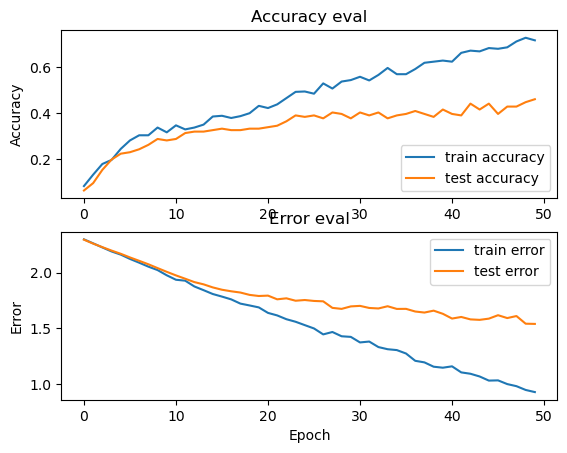

9/9 - 0s - loss: 1.6378 - accuracy: 0.4038 - 335ms/epoch - 37ms/step

Test accuracy: 0.4038461446762085


In [32]:
import json
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras
import matplotlib.pyplot as plt

DATA_PATH = "C:/Users/asus/Desktop/rnn_nounamo/data.json"


def load_data(data_path):
    """Loads training dataset from json file.

        :param data_path (str): Path to json file containing data
        :return X (ndarray): Inputs
        :return y (ndarray): Targets
    """

    with open(data_path, "r") as fp:
        data = json.load(fp)

    X = np.array(data["mfcc"])
    y = np.array(data["labels"])
    return X, y


def plot_history(history):
    """Plots accuracy/loss for training/validation set as a function of the epochs

        :param history: Training history of model
        :return:
    """

    fig, axs = plt.subplots(2)

    # create accuracy sublpot
    axs[0].plot(history.history["accuracy"], label="train accuracy")
    axs[0].plot(history.history["val_accuracy"], label="test accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy eval")

    # create error sublpot
    axs[1].plot(history.history["loss"], label="train error")
    axs[1].plot(history.history["val_loss"], label="test error")
    axs[1].set_ylabel("Error")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Error eval")

    plt.show()


def prepare_datasets(test_size, validation_size):
    """Loads data and splits it into train, validation and test sets.

    :param test_size (float): Value in [0, 1] indicating percentage of data set to allocate to test split
    :param validation_size (float): Value in [0, 1] indicating percentage of train set to allocate to validation split

    :return X_train (ndarray): Input training set
    :return X_validation (ndarray): Input validation set
    :return X_test (ndarray): Input test set
    :return y_train (ndarray): Target training set
    :return y_validation (ndarray): Target validation set
    :return y_test (ndarray): Target test set
    """

    # load data
    X, y = load_data(DATA_PATH)

    # create train, validation and test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
    X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=validation_size)

    return X_train, X_validation, X_test, y_train, y_validation, y_test


def build_model(input_shape):
    """Generates RNN-LSTM model

    :param input_shape (tuple): Shape of input set
    :return model: RNN-LSTM model
    """

    # build network topology
    model = keras.Sequential()

    # 2 LSTM layers
    model.add(keras.layers.LSTM(64, input_shape=input_shape, return_sequences=True))
    model.add(keras.layers.LSTM(64))

    # dense layer
    model.add(keras.layers.Dense(64, activation='relu'))
    model.add(keras.layers.Dropout(0.3))

    # output layer
    model.add(keras.layers.Dense(10, activation='softmax'))

    return model


if __name__ == "__main__":

    # get train, validation, test splits
    X_train, X_validation, X_test, y_train, y_validation, y_test = prepare_datasets(0.25, 0.2)

    # create network
    input_shape = (X_train.shape[1], X_train.shape[2]) # 130, 13
    model = build_model(input_shape)

    # compile model
    optimiser = keras.optimizers.Adam(learning_rate=0.0001)
    model.compile(optimizer=optimiser,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    model.summary()

    # train model
    history = model.fit(X_train, y_train, validation_data=(X_validation, y_validation), batch_size=32, epochs=50)

    # plot accuracy/error for training and validation
    plot_history(history)

    # evaluate model on test set
    test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
    print('\nTest accuracy:', test_acc)


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 130, 128)          72704     
                                                                 
 lstm_7 (LSTM)               (None, 128)               131584    
                                                                 
 dense_6 (Dense)             (None, 64)                8256      
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_7 (Dense)             (None, 10)                650       
                                                                 
Total params: 213,194
Trainable params: 213,194
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
20/20 [=============================

20/20 [==============================] - 4s 177ms/step - loss: 0.2954 - accuracy: 0.9263 - val_loss: 1.4536 - val_accuracy: 0.5897
Epoch 51/100
20/20 [==============================] - 3s 175ms/step - loss: 0.2600 - accuracy: 0.9567 - val_loss: 1.5713 - val_accuracy: 0.5769
Epoch 52/100
20/20 [==============================] - 4s 177ms/step - loss: 0.2283 - accuracy: 0.9455 - val_loss: 1.4250 - val_accuracy: 0.6090
Epoch 53/100
20/20 [==============================] - 4s 176ms/step - loss: 0.2033 - accuracy: 0.9599 - val_loss: 1.5006 - val_accuracy: 0.5769
Epoch 54/100
20/20 [==============================] - 3s 175ms/step - loss: 0.1995 - accuracy: 0.9599 - val_loss: 1.4805 - val_accuracy: 0.5833
Epoch 55/100
20/20 [==============================] - 4s 177ms/step - loss: 0.1947 - accuracy: 0.9551 - val_loss: 1.5143 - val_accuracy: 0.5962
Epoch 56/100
20/20 [==============================] - 3s 176ms/step - loss: 0.1757 - accuracy: 0.9679 - val_loss: 1.5298 - val_accuracy: 0.5897
Epoch

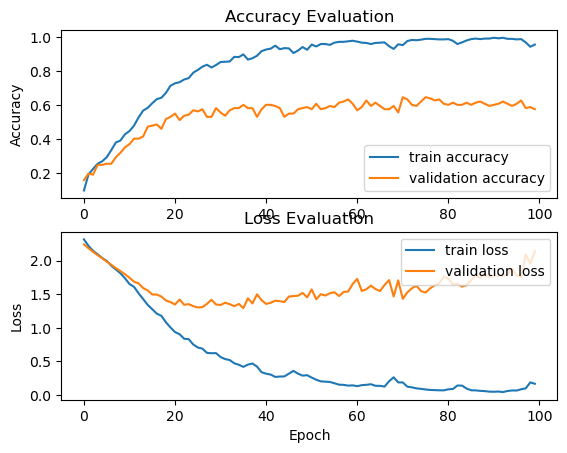

9/9 - 0s - loss: 2.1752 - accuracy: 0.5462 - 491ms/epoch - 55ms/step

Test accuracy: 0.5461538434028625


In [33]:
import json
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras
import matplotlib.pyplot as plt

DATA_PATH = "C:/Users/asus/Desktop/rnn_nounamo/data.json"


def load_data(data_path):
    """Loads training dataset from json file.

    :param data_path (str): Path to json file containing data
    :return X (ndarray): Inputs
    :return y (ndarray): Targets
    """
    with open(data_path, "r") as fp:
        data = json.load(fp)

    X = np.array(data["mfcc"])
    y = np.array(data["labels"])
    return X, y


def plot_history(history):
    """Plots accuracy/loss for training/validation set as a function of the epochs

    :param history: Training history of model
    :return:
    """
    fig, axs = plt.subplots(2)

    # create accuracy subplot
    axs[0].plot(history.history["accuracy"], label="train accuracy")
    axs[0].plot(history.history["val_accuracy"], label="validation accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy Evaluation")

    # create error subplot
    axs[1].plot(history.history["loss"], label="train loss")
    axs[1].plot(history.history["val_loss"], label="validation loss")
    axs[1].set_ylabel("Loss")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Loss Evaluation")

    plt.show()


def prepare_datasets(test_size, validation_size):
    """Loads data and splits it into train, validation, and test sets.

    :param test_size (float): Value in [0, 1] indicating the percentage of the dataset to allocate to the test split
    :param validation_size (float): Value in [0, 1] indicating the percentage of the train set to allocate to the validation split

    :return X_train (ndarray): Input training set
    :return X_validation (ndarray): Input validation set
    :return X_test (ndarray): Input test set
    :return y_train (ndarray): Target training set
    :return y_validation (ndarray): Target validation set
    :return y_test (ndarray): Target test set
    """

    # load data
    X, y = load_data(DATA_PATH)

    # create train, validation, and test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
    X_train, X_validation, y_train, y_validation = train_test_split(
        X_train, y_train, test_size=validation_size, random_state=42
    )

    return X_train, X_validation, X_test, y_train, y_validation, y_test


def build_model(input_shape):
    """Generates RNN-LSTM model

    :param input_shape (tuple): Shape of the input set
    :return model: RNN-LSTM model
    """

    # build network topology
    model = keras.Sequential()

    # 2 LSTM layers
    model.add(keras.layers.LSTM(128, input_shape=input_shape, return_sequences=True))
    model.add(keras.layers.LSTM(128))

    # dense layer
    model.add(keras.layers.Dense(64, activation="relu"))
    model.add(keras.layers.Dropout(0.3))

    # output layer
    model.add(keras.layers.Dense(10, activation="softmax"))

    return model


if __name__ == "__main__":

    # get train, validation, test splits
    X_train, X_validation, X_test, y_train, y_validation, y_test = prepare_datasets(0.25, 0.2)

    # create network
    input_shape = (X_train.shape[1], X_train.shape[2])  # 130, 13
    model = build_model(input_shape)

    # compile model
    optimizer = keras.optimizers.Adam(learning_rate=0.0001)
    model.compile(
        optimizer=optimizer, loss="sparse_categorical_crossentropy", metrics=["accuracy"]
    )

    model.summary()

    # train model
    history = model.fit(
        X_train,
        y_train,
        validation_data=(X_validation, y_validation),
        batch_size=32,
        epochs=100,  # Increased number of epochs
        verbose=1,
    )

    # plot accuracy/error for training and validation
    plot_history(history)

    # evaluate model on test set
    test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
    print("\nTest accuracy:", test_acc)


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 130, 128)          72704     
                                                                 
 lstm_9 (LSTM)               (None, 128)               131584    
                                                                 
 dense_8 (Dense)             (None, 64)                8256      
                                                                 
 dropout_4 (Dropout)         (None, 64)                0         
                                                                 
 dense_9 (Dense)             (None, 10)                650       
                                                                 
Total params: 213,194
Trainable params: 213,194
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
20/20 [=============================

20/20 [==============================] - 4s 184ms/step - loss: 0.2430 - accuracy: 0.9423 - val_loss: 1.7776 - val_accuracy: 0.5256
Epoch 51/100
20/20 [==============================] - 4s 194ms/step - loss: 0.3856 - accuracy: 0.8958 - val_loss: 1.7069 - val_accuracy: 0.5449
Epoch 52/100
20/20 [==============================] - 4s 191ms/step - loss: 0.3126 - accuracy: 0.9183 - val_loss: 1.5841 - val_accuracy: 0.5641
Epoch 53/100
20/20 [==============================] - 4s 184ms/step - loss: 0.2087 - accuracy: 0.9599 - val_loss: 1.5947 - val_accuracy: 0.5256
Epoch 54/100
20/20 [==============================] - 3s 175ms/step - loss: 0.3133 - accuracy: 0.9087 - val_loss: 1.4899 - val_accuracy: 0.5769
Epoch 55/100
20/20 [==============================] - 3s 175ms/step - loss: 0.2862 - accuracy: 0.9327 - val_loss: 1.5687 - val_accuracy: 0.5641
Epoch 56/100
20/20 [==============================] - 3s 175ms/step - loss: 0.1943 - accuracy: 0.9567 - val_loss: 1.6052 - val_accuracy: 0.5577
Epoch

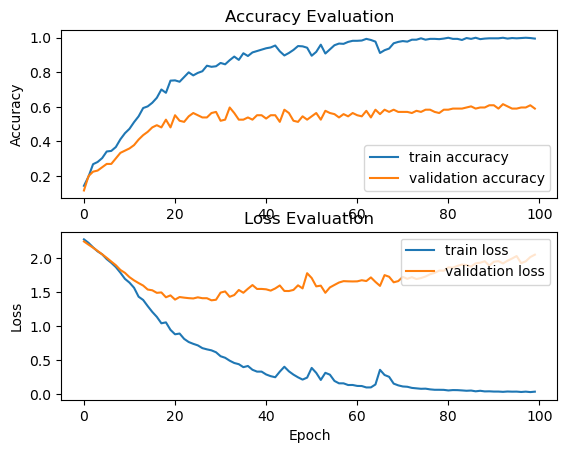

9/9 - 1s - loss: 2.1587 - accuracy: 0.5692 - 583ms/epoch - 65ms/step

Test accuracy: 0.5692307949066162


In [34]:
import json
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras
import matplotlib.pyplot as plt

DATA_PATH = "C:/Users/asus/Desktop/rnn_nounamo/data.json"


def load_data(data_path):
    """Loads training dataset from json file.

    :param data_path (str): Path to json file containing data
    :return X (ndarray): Inputs
    :return y (ndarray): Targets
    """
    with open(data_path, "r") as fp:
        data = json.load(fp)

    X = np.array(data["mfcc"])
    y = np.array(data["labels"])
    return X, y


def plot_history(history):
    """Plots accuracy/loss for training/validation set as a function of the epochs

    :param history: Training history of model
    :return:
    """
    fig, axs = plt.subplots(2)

    # create accuracy subplot
    axs[0].plot(history.history["accuracy"], label="train accuracy")
    axs[0].plot(history.history["val_accuracy"], label="validation accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy Evaluation")

    # create error subplot
    axs[1].plot(history.history["loss"], label="train loss")
    axs[1].plot(history.history["val_loss"], label="validation loss")
    axs[1].set_ylabel("Loss")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Loss Evaluation")

    plt.show()


def prepare_datasets(test_size, validation_size):
    """Loads data and splits it into train, validation, and test sets.

    :param test_size (float): Value in [0, 1] indicating the percentage of the dataset to allocate to the test split
    :param validation_size (float): Value in [0, 1] indicating the percentage of the train set to allocate to the validation split

    :return X_train (ndarray): Input training set
    :return X_validation (ndarray): Input validation set
    :return X_test (ndarray): Input test set
    :return y_train (ndarray): Target training set
    :return y_validation (ndarray): Target validation set
    :return y_test (ndarray): Target test set
    """

    # load data
    X, y = load_data(DATA_PATH)

    # create train, validation, and test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
    X_train, X_validation, y_train, y_validation = train_test_split(
        X_train, y_train, test_size=validation_size, random_state=42
    )

    return X_train, X_validation, X_test, y_train, y_validation, y_test


def build_model(input_shape):
    """Generates RNN-LSTM model

    :param input_shape (tuple): Shape of the input set
    :return model: RNN-LSTM model
    """

    # build network topology
    model = keras.Sequential()

    # 2 LSTM layers
    model.add(keras.layers.LSTM(128, input_shape=input_shape, return_sequences=True))
    model.add(keras.layers.LSTM(128))

    # dense layer
    model.add(keras.layers.Dense(64, activation="relu"))
    model.add(keras.layers.Dropout(0.3))

    # output layer
    model.add(keras.layers.Dense(10, activation="softmax"))

    return model


if __name__ == "__main__":

    # get train, validation, test splits
    X_train, X_validation, X_test, y_train, y_validation, y_test = prepare_datasets(0.25, 0.2)

    # create network
    input_shape = (X_train.shape[1], X_train.shape[2])  # 130, 13
    model = build_model(input_shape)

    # compile model
    optimizer = keras.optimizers.Adam(learning_rate=0.0001)
    model.compile(
        optimizer=optimizer, loss="sparse_categorical_crossentropy", metrics=["accuracy"]
    )

    model.summary()

    # train model
    history = model.fit(
        X_train,
        y_train,
        validation_data=(X_validation, y_validation),
        batch_size=32,
        epochs=100,  # Increased number of epochs
        verbose=1,
    )

    # plot accuracy/error for training and validation
    plot_history(history)

    # evaluate model on test set
    test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
    print("\nTest accuracy:", test_acc)


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 65, 64)            4224      
                                                                 
 batch_normalization (BatchN  (None, 65, 64)           256       
 ormalization)                                                   
                                                                 
 gru (GRU)                   (None, 65, 128)           74496     
                                                                 
 gru_1 (GRU)                 (None, 128)               99072     
                                                                 
 dense_10 (Dense)            (None, 64)                8256      
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                      

20/20 [==============================] - 2s 105ms/step - loss: 1.0109 - accuracy: 0.6955 - val_loss: 1.3653 - val_accuracy: 0.5256
Epoch 49/100
20/20 [==============================] - 2s 105ms/step - loss: 1.0000 - accuracy: 0.6763 - val_loss: 1.3335 - val_accuracy: 0.5256
Epoch 50/100
20/20 [==============================] - 2s 107ms/step - loss: 0.9808 - accuracy: 0.6683 - val_loss: 1.3450 - val_accuracy: 0.5641
Epoch 51/100
20/20 [==============================] - 2s 105ms/step - loss: 0.9274 - accuracy: 0.7179 - val_loss: 1.3248 - val_accuracy: 0.5321
Epoch 52/100
20/20 [==============================] - 2s 105ms/step - loss: 0.9029 - accuracy: 0.7035 - val_loss: 1.3308 - val_accuracy: 0.5449
Epoch 53/100
20/20 [==============================] - 2s 105ms/step - loss: 0.8992 - accuracy: 0.7099 - val_loss: 1.3331 - val_accuracy: 0.5321
Epoch 54/100
20/20 [==============================] - 2s 105ms/step - loss: 0.9165 - accuracy: 0.6907 - val_loss: 1.3191 - val_accuracy: 0.5385
Epoch

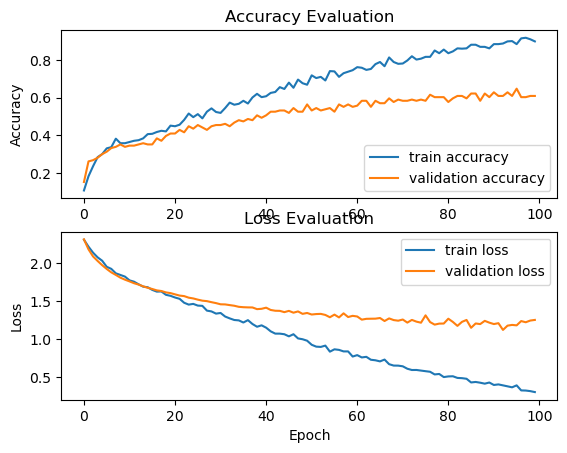

9/9 - 0s - loss: 1.3562 - accuracy: 0.6192 - 256ms/epoch - 28ms/step

Test accuracy: 0.6192307472229004


In [35]:
import json
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

DATA_PATH = "C:/Users/asus/Desktop/rnn_nounamo/data.json"

def load_data(data_path):
    with open(data_path, "r") as fp:
        data = json.load(fp)

    X = np.array(data["mfcc"])
    y = np.array(data["labels"])
    return X, y

def plot_history(history):
    fig, axs = plt.subplots(2)

    axs[0].plot(history.history["accuracy"], label="train accuracy")
    axs[0].plot(history.history["val_accuracy"], label="validation accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy Evaluation")

    axs[1].plot(history.history["loss"], label="train loss")
    axs[1].plot(history.history["val_loss"], label="validation loss")
    axs[1].set_ylabel("Loss")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Loss Evaluation")

    plt.show()

def prepare_datasets(test_size, validation_size):
    X, y = load_data(DATA_PATH)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
    X_train, X_validation, y_train, y_validation = train_test_split(
        X_train, y_train, test_size=validation_size, random_state=42
    )

    return X_train, X_validation, X_test, y_train, y_validation, y_test

def build_model(input_shape):
    model = keras.Sequential()
    
    model.add(keras.layers.Conv1D(64, 5, strides=2, padding='same', activation='relu', input_shape=input_shape))
    model.add(keras.layers.BatchNormalization())
    
    # Remplacement des couches LSTM par des couches GRU
    model.add(keras.layers.GRU(128, return_sequences=True))
    model.add(keras.layers.GRU(128))
    
    model.add(keras.layers.Dense(64, activation='relu'))
    model.add(keras.layers.Dropout(0.3))
    
    model.add(keras.layers.Dense(10, activation='softmax'))

    return model

if __name__ == "__main__":
    X_train, X_validation, X_test, y_train, y_validation, y_test = prepare_datasets(0.25, 0.2)

    input_shape = (X_train.shape[1], X_train.shape[2])
    model = build_model(input_shape)

    optimizer = keras.optimizers.Adam(learning_rate=0.0001)
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    model.summary()

    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    checkpoint = ModelCheckpoint('best_model.h5', monitor='val_accuracy', save_best_only=True)

    history = model.fit(
        X_train,
        y_train,
        validation_data=(X_validation, y_validation),
        batch_size=32,
        epochs=100,
        callbacks=[early_stopping, checkpoint],
        verbose=1,
    )

    plot_history(history)

    test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
    print('\nTest accuracy:', test_acc)
